## Task 2 - Diamonds Dataset
#### Tim Gormly
#### 2/18/2023

<hr>

In this module, we will will analyze diamonds.csv, a public dataset containing the price and other attributes of over fifty thousand diamonds.  This dataset can be found online at https://www.kaggle.com/datasets/shivam2503/diamonds?resource=download.

<hr>

## 1. Load

To begin, we will import Pandas and use csv_read() to load the csv file into a Pandas DataFrame.

In [133]:
import pandas as pd

df = pd.read_csv('diamonds.csv', index_col = 0)

<hr>

## 2. View

Now that the DataFrame has been built, we will view the first 7 and last 7 rows of the DataFrame.

In [134]:
# calling the method with 7 as a parameter causes it to display 7 rows instead of its default, 5.
df.head(7) 

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [135]:
df.tail(7)

,carat,cut,color,clarity,depth,table,price,x,y,z
53934,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


<hr>

## 3. Describe

We have a sense of the data contained in this DataFrame.  Each row is a specific diamond, and each column contains information about that diamond.  We can use the DataFrame describe() function to learn additional information about the numerical data in this DataFrame's columns.

But first, we'll adjust precision down to two decimal places for clarity.

In [136]:
pd.set_option("display.precision", 2)

df.describe()

,carat,depth,table,price,x,y,z
count,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00
mean,0.80,61.75,57.46,3932.80,5.73,5.73,3.54
std,0.47,1.43,2.23,3989.44,1.12,1.14,0.71
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,950.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,1.04,62.50,59.00,5324.25,6.54,6.54,4.04
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


<hr>

## 4. Series

We can use Series methods to describe statistics for the non-numerical data in the DataFrame.  We can use the unique() Series method to see a collection of all unique items within a column.

In [137]:
df.cut.describe()

count     53940
unique        5
top       Ideal
freq      21551
Name: cut, dtype: object

This tells us that there are 53,940 total diamonds.  There are 5 unique ways that a diamond's cut is described by this dataset - this is shown by  the unique row of describe().  Of the 5 unique ways a diamond's cut is described, "Ideal" is present more than other descriptions, with a total of 21,551 diamonds being considered to have an "ideal" cut.

In [138]:
df.color.describe()

count     53940
unique        7
top           G
freq      11292
Name: color, dtype: object

In this result, there are the same total number of diamonds, 7 unique colors in the dataset.  G occurs more frequently than other colors with 11292 total results.

In [139]:
df.clarity.describe()

count     53940
unique        8
top         SI1
freq      13065
Name: clarity, dtype: object

There are 8 different ways that a diamond's clarity is described in this DataFrame.  "SI1" is the most prevalent description of clarity with 13,065 total results.

<hr>

## 4. Unique

The unique() method can be used to display all unique category values (non-numerical values) of a given column.  Let's see what values were part of the three columns we looked at during 3. Describe.

In [140]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [141]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [142]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

<hr>

## 5. Histograms.

We can view histograms of each column with numerical data using the DataFrame hist() method.

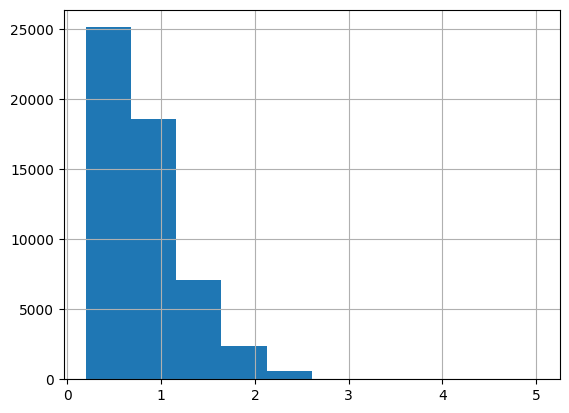

In [143]:
hist = df.carat.hist()

Quickly, we can see that nearly all diamond carats are around 1.0 or below.  Very few diamonds have a greater carat than that, but there is one or more diamonds with at least 5 carats. 

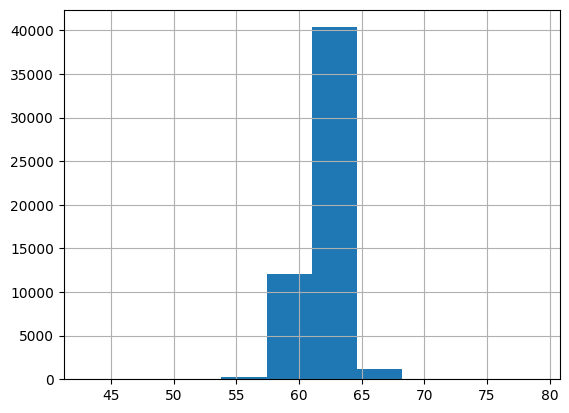

In [144]:
hist = df.depth.hist()

Most diamond depths are within a fairly narrow band, about  62 or so.  There are outliers that are far below, or far above this narrow band. The vast majority of the diamonds have depth in a slightly larger band between 57.5 and 67.5.

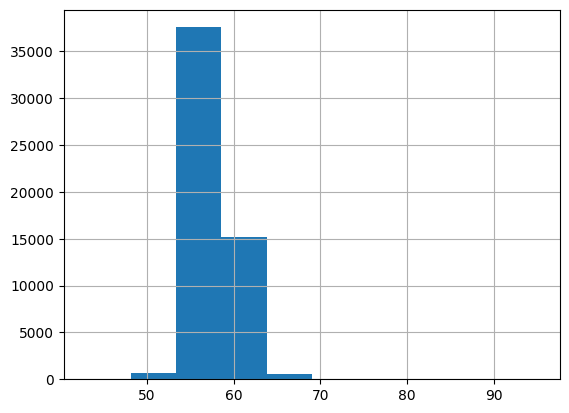

In [145]:
hist = df.table.hist()

This result for a diamond's table is similar to the previous result of a diamond's depth.  There is a clear narrow band and slightly broader band with an extremely high consentration of results.  There are outliers with much greater or much lower values than this band.

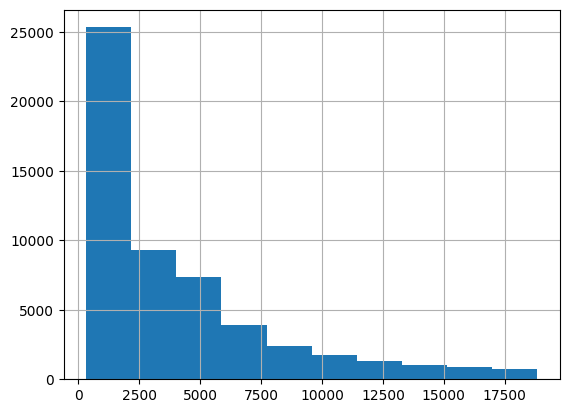

In [146]:
hist = df.price.hist()

Many diamonds have prices below $10,000, but a significant number of diamonds are more expensive than that.  There seems to be an inverse exponential relationship between the price of a diamond and the quantity of diamonds near that price point.

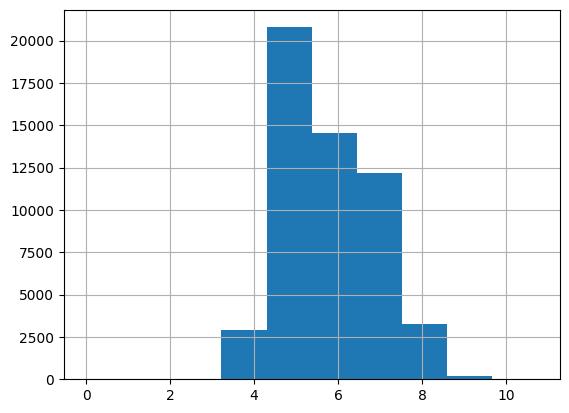

In [147]:
hist = df.x.hist()

Many diamonds have an x dimension between 4 and 8.  Few diamonds fall outside of that band.

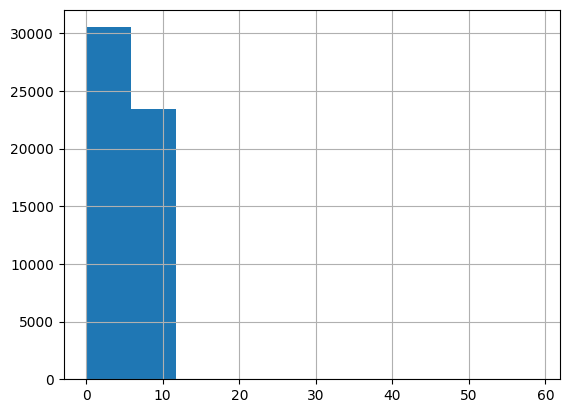

In [148]:
hist = df.y.hist()

Nearly all diamonds have a y dimension between 0 and 11, while there is at least one or more outliers with y values as high as 60.

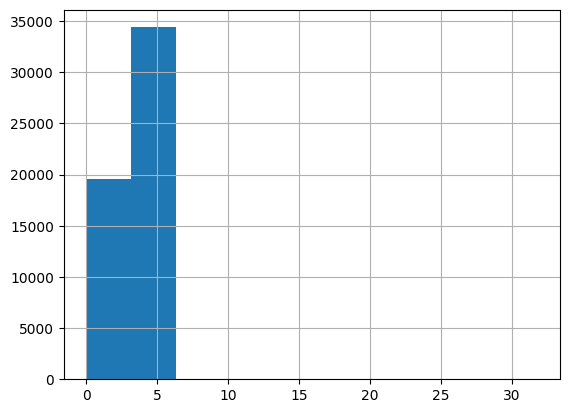

In [149]:
hist = df.z.hist()

Z dimension values are similar to y dimension values, but with a smaller range in values.  Most values exist between 0 and 6.5 or so.  There is one or more outliers with z values beyond 30.